In [1]:
import numpy as np
import pandas as pd

In [2]:
income_dataset = pd.read_csv('Income_Data.csv')
income_dataset.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [3]:
income_dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
income_dataset.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [5]:
income_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
income_dataset.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [7]:
income_dataset.duplicated().sum()

0

In [8]:
income_dataset.isna().sum()

income       0
happiness    0
dtype: int64

In [9]:
X = income_dataset.iloc[:,:-1].values
y = income_dataset.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = linear_regressor.predict(X_test)

In [13]:
y_pred

array([4.61136034, 4.74097829, 2.77748749, 3.89638306, 5.01884598,
       2.78995245, 3.74737829, 1.92079696, 3.24322412, 2.74652107,
       4.82903679, 4.03196541, 4.75096529, 5.26843318, 1.36246853,
       3.54044027, 5.50198771, 2.72460611, 5.11024121, 2.62480178,
       2.92852471, 2.06185697, 1.3287457 , 2.69478754, 4.10653795,
       5.44235502, 3.58838672, 2.81027453, 2.07727532, 5.40447488,
       4.20654894, 3.58353872, 3.99275939, 1.68666302, 4.47404893,
       2.72472211, 3.17676767, 1.5345947 , 2.12310002, 3.41892281,
       2.70461734, 3.92351182, 3.6443335 , 4.11213195, 4.83539358,
       3.21540055, 3.17378567, 2.33809548, 4.70033499, 4.26849084,
       1.30619318, 2.54182414, 1.82494859, 3.51153932, 1.61886511,
       3.54873896, 2.759206  , 1.40273875, 2.67589075, 4.0504115 ,
       3.2329332 , 1.28452928, 3.60829093, 3.21018718, 2.65389237,
       2.88395145, 1.99761435, 1.33813377, 3.80592613, 5.36855314,
       3.03864228, 4.09616554, 1.69405379, 3.8271211 , 3.85339

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)

# Printing the calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2_score:.2f}")

Mean Absolute Error (MAE): 0.55
Mean Squared Error (MSE): 0.46
Root Mean Squared Error (RMSE): 0.68
R-squared Score (R²): 0.77


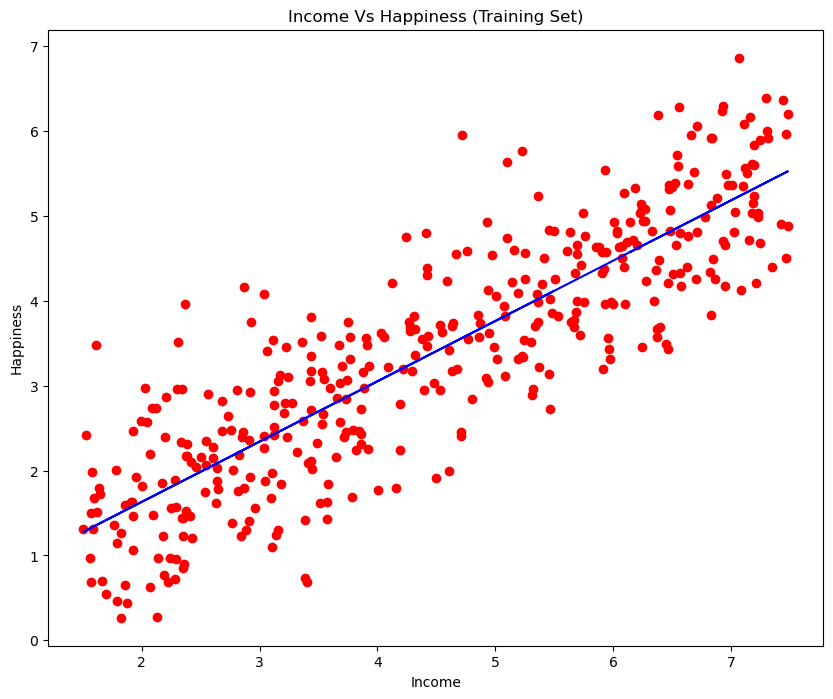

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,linear_regressor.predict(X_train),color='blue')
plt.title('Income Vs Happiness (Training Set)')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

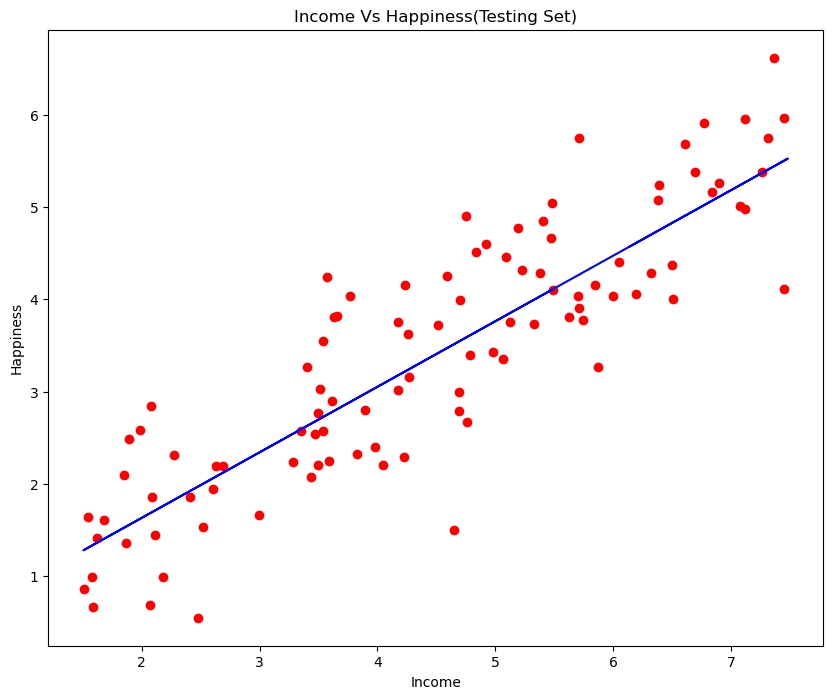

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,linear_regressor.predict(X_train),color='blue')
plt.title('Income Vs Happiness(Testing Set)')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

In [17]:
predict = linear_regressor.predict([[7.1]])
predict

array([5.25457009])

In [19]:
# Displaying coefficients
print("Coefficients(M): ", linear_regressor.coef_)
print("Intercept (C): ", linear_regressor.intercept_)

Coefficients(M):  [0.71073214]
Intercept (C):  0.20837192496115886
